In [23]:
import pandas as pd
import gzip
from scipy.io import mmwrite
from scipy import sparse
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
dest = '/home/lguirardel/data/perturb_comp/toy/toy1/'
path = dest+'toy.processed'

In [25]:
d = 25
n = 12
N = 100
p=0.3

In [26]:
X_list = []
for i in range(n):
    c = np.random.normal(loc=np.zeros((d,)))
    c = c/np.linalg.norm(c)
    c = c + np.random.normal(np.zeros((N,d,)), scale=0.05)
    # c = (c*100).astype(int) # to integers
    # c[np.random.uniform(0,1,(N,d)) < p ] = 0 # sparsify
    X_list.append(c)
X = np.concatenate(X_list, axis=0)

In [27]:
X.shape

(1200, 25)

In [28]:
X[0]

array([-0.22386563,  0.23666167,  0.05477784, -0.14875249,  0.2012183 ,
       -0.02081112, -0.15185936,  0.20494827, -0.19806534, -0.09084848,
       -0.19101368, -0.31713657, -0.12096819, -0.33262115, -0.13300229,
        0.10936143, -0.18971624,  0.23626858, -0.0367211 , -0.07786642,
       -0.11951139, -0.13338647, -0.4070093 ,  0.03859864,  0.23720221])

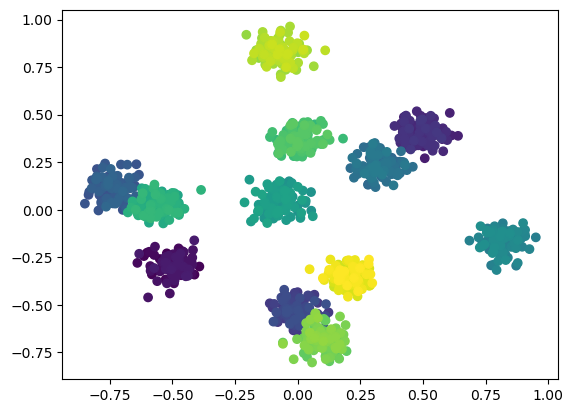

In [29]:
X_red = PCA(2).fit_transform(X)
plt.scatter(*X_red.T, c= [i for i in range(N) for j in range(n)])

In [30]:
# D = np.zeros((n,n))
# for i in range(n):
#     for j in range(n):
#         a1, a2 = X_list[i], X_list[j]
#         D[i,j] = ((a1[:,None,:] - a2[None, :, :])**2).sum()**(1/2)/N


In [31]:
# pd.DataFrame(D, index=range(n), columns=range(n))

We need fake matrix, genes, cells, variants2cell, and variants 

In [32]:
X = sparse.coo_matrix(X)

In [33]:
path

'/home/lguirardel/data/perturb_comp/toy/toy1/toy.processed'

In [34]:
# matrix
with gzip.open(path+'.matrix.mtx.gz', 'wb') as file:
    mmwrite(file, X)

In [35]:
# genes
with gzip.open(path+'.genes.csv.gz', 'wb') as file:
    for i in range(d):
        file.write(f'gene_{i}\n'.encode())

In [36]:
# cells
with gzip.open(path+'.cells.csv.gz', 'wb') as file:
    for i in range(N*n):
        file.write(f'cell_{i}\n'.encode())

In [37]:
# cell to variant
# there is a bunch of other info in there but we don't care
with gzip.open(dest+'/toy.variants2cell.csv.gz', 'wb') as file:
    file.write('cell\tvariant\n'.encode())
    for i in range(n):
        for j in range(N):
            file.write(f'cell_{i*N+j}\tvariant_{i}\n'.encode())

In [38]:
# variant to class
df = pd.DataFrame()
df['variant'] = [f'variant_{i}' for i in range(n)]
df['Variant functional class'] = [f'fc_{i}' for i in range(n)]
df = df.set_index('variant')
df.to_csv(path+'.variants.csv')


# Time to test

In [16]:
%load_ext autoreload
%autoreload 1
%aimport main
%aimport data_utils

In [17]:
from main import *

In [18]:
paths = get_paths(dest)
paths

['/home/lguirardel/data/perturb_comp/toy/toy-big/toy.processed.matrix.mtx.gz',
 '/home/lguirardel/data/perturb_comp/toy/toy-big/toy.processed.genes.csv.gz',
 '/home/lguirardel/data/perturb_comp/toy/toy-big/toy.processed.cells.csv.gz',
 '/home/lguirardel/data/perturb_comp/toy/toy-big/toy.variants2cell.csv.gz',
 '/home/lguirardel/data/perturb_comp/toy/toy-big/toy.processed.variants.csv']

In [19]:
counts = load_data(*paths, group_wt_like=False)

	Reading files...
		Reading matrix


		Reading genes and cells
		Reading variant data
	Merging and processing...
		100 variant classes


In [20]:
counts

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_1001,gene_1002,gene_1003,gene_1004,gene_1005,...,gene_992,gene_993,gene_994,gene_995,gene_996,gene_997,gene_998,gene_999,variant,Variant functional class
cell,,,,,,,,,,,,,,,,,,,,,
cell_0,0.018055,-0.065513,0.048219,-0.028204,0.075642,-0.003535,0.052849,0.079959,0.020276,-0.006602,...,-0.008638,-0.060961,0.013777,-0.086458,0.075094,-0.063936,0.162207,-0.025262,variant_0,fc_0
cell_1,0.018673,-0.031662,0.108493,-0.083683,0.080861,0.010854,0.015538,0.011764,-0.007942,-0.066458,...,0.090644,-0.052863,0.073582,-0.118343,0.060745,-0.090127,0.067542,-0.099589,variant_0,fc_0
cell_10,-0.024666,0.001288,0.031870,-0.045915,-0.015328,-0.047174,0.052578,0.125195,-0.037959,0.002597,...,0.034314,-0.069019,0.025454,-0.145337,0.020041,-0.077708,0.067229,0.066649,variant_0,fc_0
cell_100,0.025743,-0.052633,0.062502,0.020231,0.011387,-0.096433,0.019998,-0.050679,-0.044869,0.088036,...,0.072984,-0.065194,-0.019889,-0.131387,0.056194,0.020120,-0.040233,-0.029726,variant_0,fc_0
cell_1000,-0.020881,0.032970,-0.072205,0.021817,0.031825,0.050976,0.010770,-0.036654,0.062655,0.038134,...,0.022388,0.059542,0.058352,0.023470,-0.008915,-0.074231,0.033738,-0.009518,variant_1,fc_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_9995,0.002001,0.118458,0.020461,0.068363,0.028783,0.062182,0.022633,-0.005940,-0.049943,0.032901,...,-0.075236,-0.055289,0.125413,-0.152098,0.048885,-0.057693,0.002531,-0.031569,variant_11,fc_11
cell_9996,0.096240,0.040384,-0.015307,-0.042751,0.118955,0.046455,0.100458,-0.044558,-0.090925,-0.020668,...,-0.056250,-0.028167,0.042858,0.002848,0.087095,-0.018272,-0.021690,-0.057667,variant_11,fc_11
cell_9997,-0.050283,0.029724,0.067476,0.104338,-0.005346,0.025258,-0.005777,0.098517,-0.085781,0.020789,...,-0.035932,-0.023931,0.081955,-0.097609,-0.033568,-0.013465,0.046746,-0.004968,variant_11,fc_11


In [22]:
counts.shape

(84000, 1226)